In [1]:
import data_loader as dl
import data_visualizer as dv 
import numpy as np
import pandas as pd
import logging
import os
import warnings
import seaborn as sns
import predictor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso, Ridge, BayesianRidge, HuberRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler  
from lgbm_regressor import evaluate_regressor as evaluate_lgbm, tune_hyperparameters as tune_lgbm
from extra_trees_regressor import evaluate_regressor as evaluate_extra_trees, tune_hyperparameters as tune_extra_trees
from adaboost_regressor import evaluate_regressor as evaluate_adaboost, tune_hyperparameters as tune_adaboost
from decision_tree_regressor import evaluate_regressor as evaluate_decision_tree, tune_hyperparameters as tune_decision_tree
from knn_regressor import evaluate_regressor as evaluate_knn, tune_hyperparameters as tune_knn

warnings.filterwarnings("ignore")

logging.basicConfig(filename='log.log', level=logging.INFO, format="%(asctime)s %(levelname)s %(module)s %(message)s")
logger = logging.getLogger(__name__)
# Загрузка данных

file_csv = 'car_price_dataset.csv'

try:
    loader = dl.DataLoader()
    df = loader.load_csv(file_csv)
except Exception as e:
    logger.exception(f"Ошибка при загрузке CSV: {e}")    

df.head()


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [2]:
df.describe()


,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


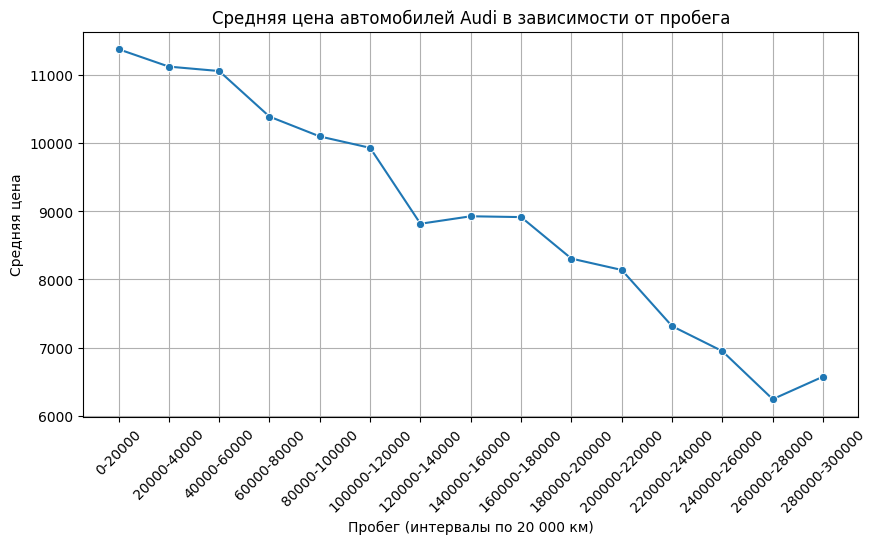

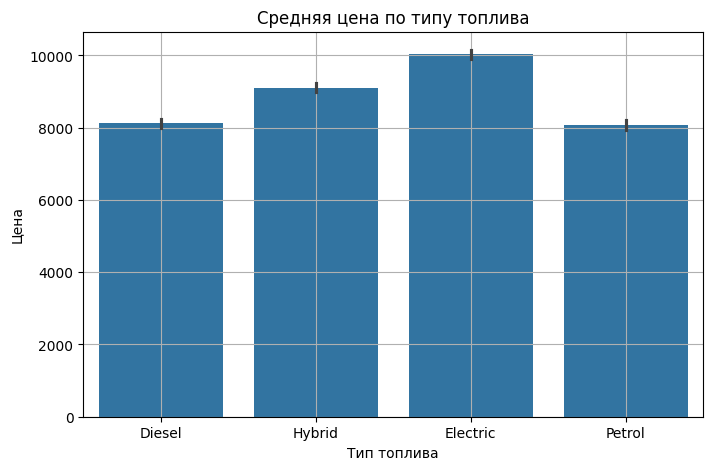

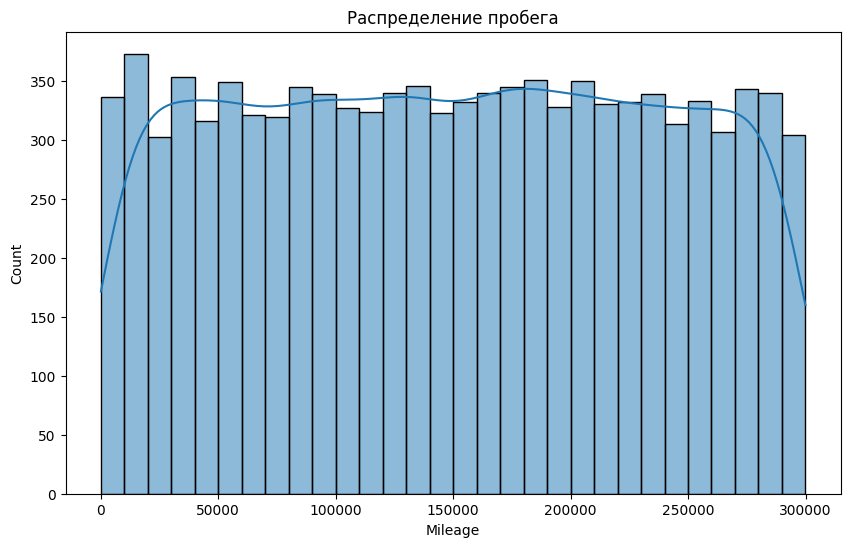

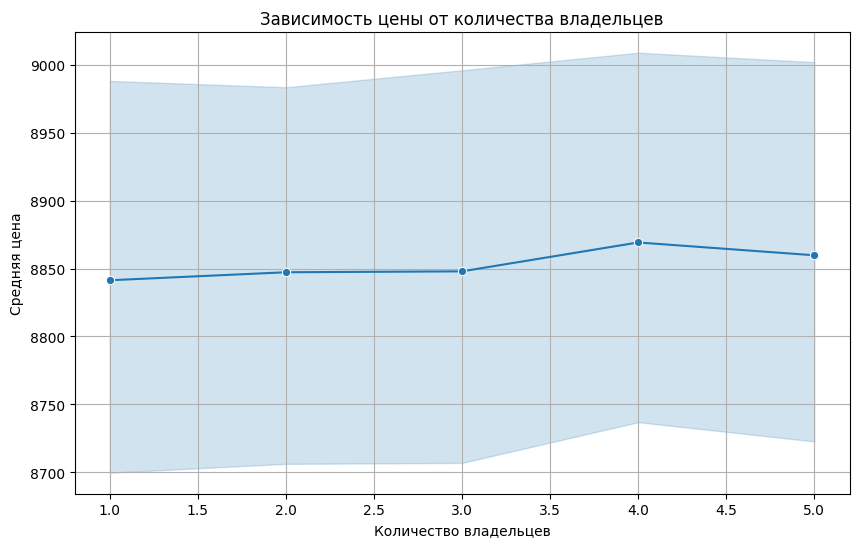

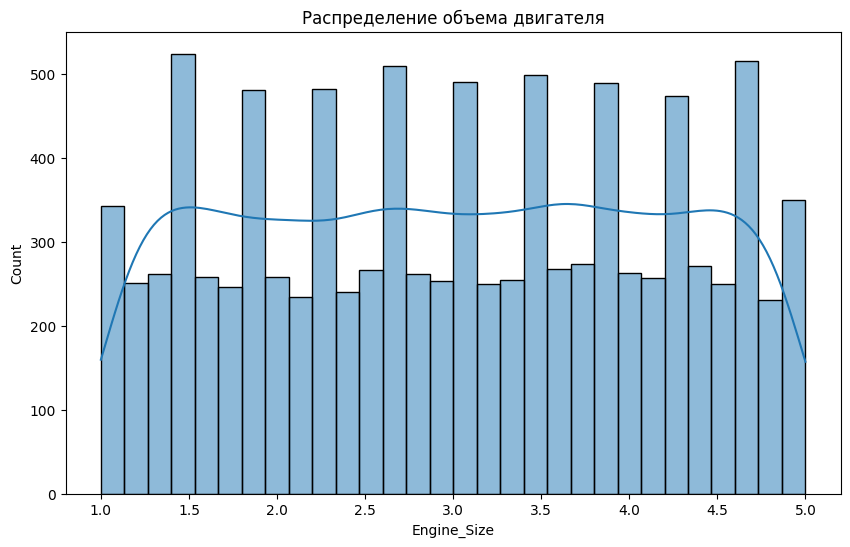

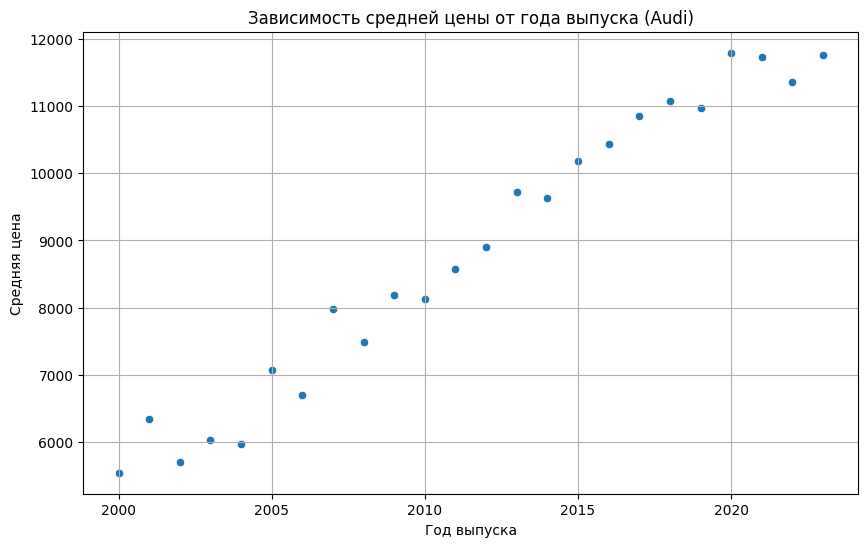

In [2]:
visualizer = dv.DataVisualizer(df)

# Вызов функций для визуализации
visualizer.plot_all()

Настройка и оценка модели: LGBM


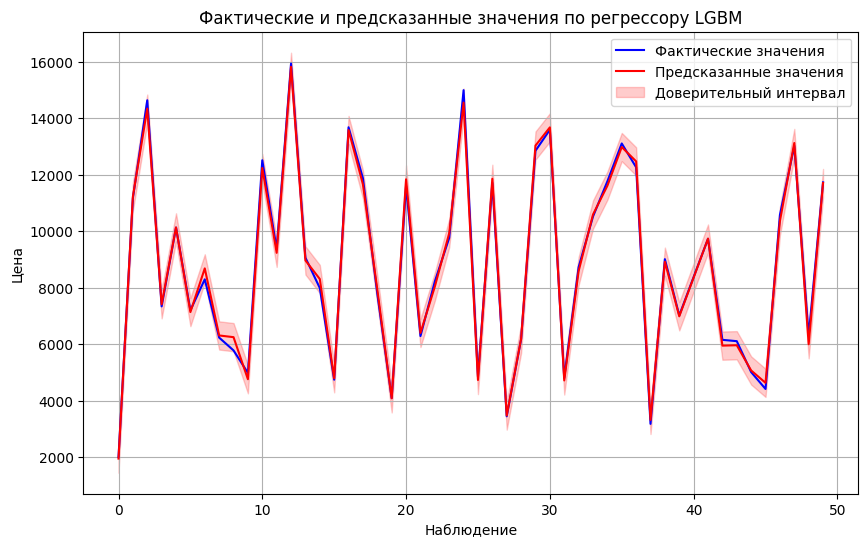

Результаты для LGBM: {'MAE': 113.48650742441122, 'MSE': 20840.310935041598, 'R²': 0.9977317438277812, 'CV R² Mean': np.float64(0.9974773307475798), 'CV R² Std': np.float64(0.0002050913765721814), 'y_pred': array([ 1946.74684597, 11220.38441922, 14333.75784249, ...,
        8304.91870146,  6534.73483253, 11785.7581326 ], shape=(2000,))}

Настройка и оценка модели: Extra Trees


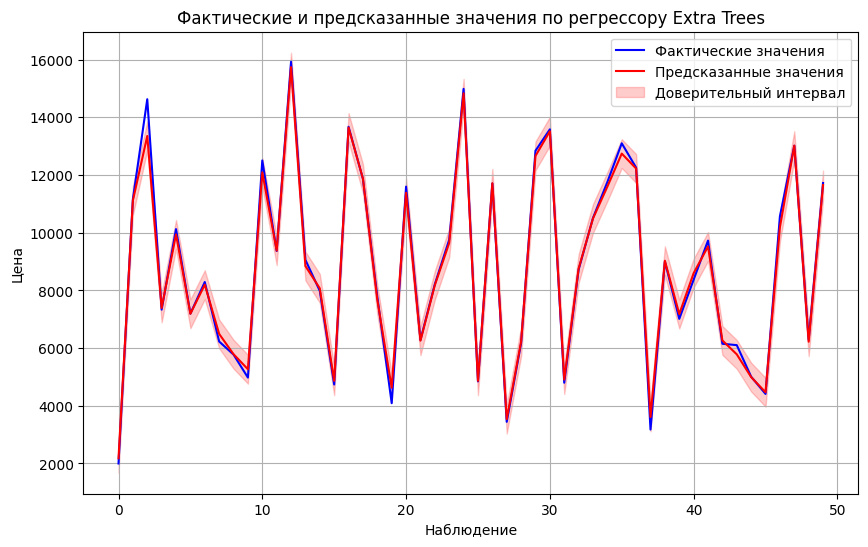

Результаты для Extra Trees: {'MAE': 159.98056480357138, 'MSE': 49200.42595009971, 'R²': 0.9946450333593891, 'CV R² Mean': np.float64(0.9940847061381053), 'CV R² Std': np.float64(0.00047247658171529214), 'y_pred': array([ 2179.45916667, 11118.81875   , 13354.17033333, ...,
        8285.19458333,  6674.62416667, 11916.01325   ], shape=(2000,))}

Настройка и оценка модели: AdaBoost


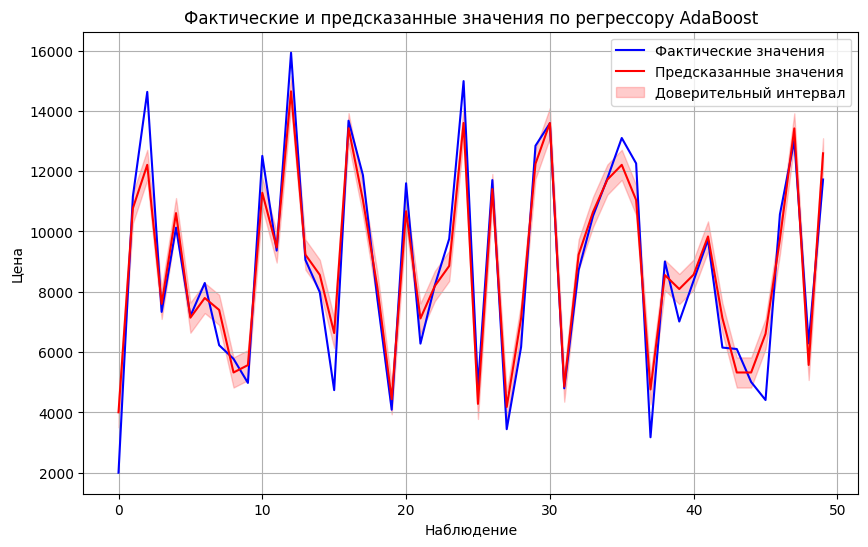

Результаты для AdaBoost: {'MAE': 625.6513963573492, 'MSE': 623786.6544714156, 'R²': 0.9321071584026412, 'CV R² Mean': np.float64(0.9244639202296876), 'CV R² Std': np.float64(0.004810671480595242), 'y_pred': array([ 4004.71302817, 10772.01021401, 12210.66273353, ...,
        7750.18269653,  7129.19992456, 11038.99205776], shape=(2000,))}

Настройка и оценка модели: Decision Tree


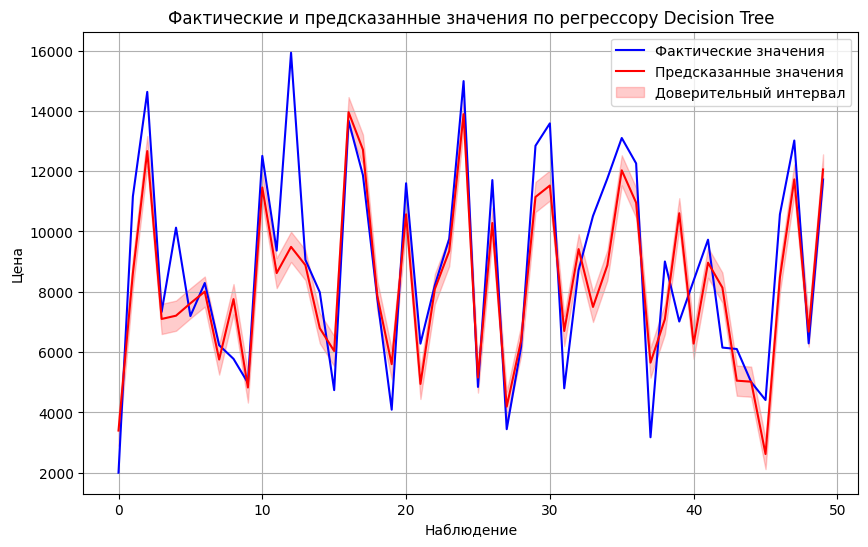

Результаты для Decision Tree: {'MAE': 1248.4964031989975, 'MSE': 2643231.8798563606, 'R²': 0.7123110569330073, 'CV R² Mean': np.float64(0.6950348059823426), 'CV R² Std': np.float64(0.033925089478586384), 'y_pred': array([ 3398.        ,  8617.33333333, 12667.33333333, ...,
        6531.83333333,  8566.2       , 11426.58333333], shape=(2000,))}

Настройка и оценка модели: KNN


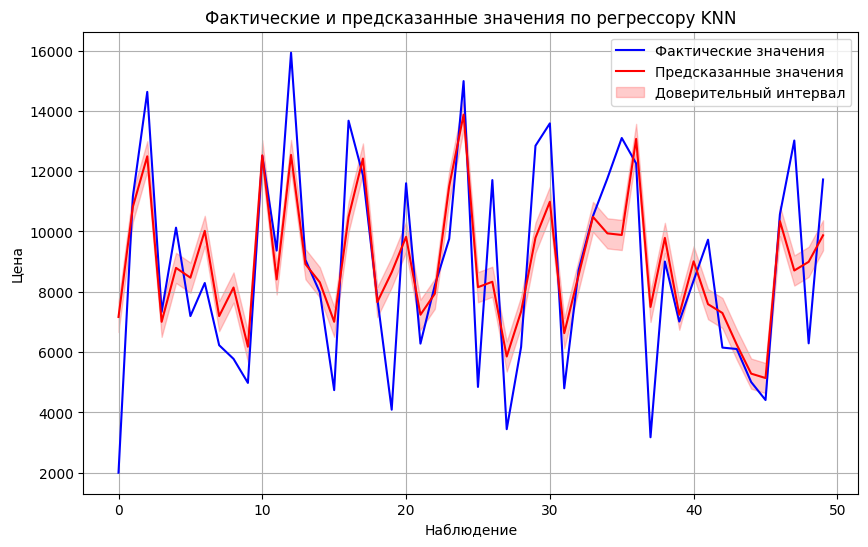

Результаты для KNN: {'MAE': 1411.5348130017574, 'MSE': 3135270.8998742355, 'R²': 0.6587576071976956, 'CV R² Mean': np.float64(0.641032637718142), 'CV R² Std': np.float64(0.010346310044413335), 'y_pred': array([ 7165.80839419, 10823.03983755, 12493.92254179, ...,
       10015.39465226,  8313.54354753, 10803.08936928], shape=(2000,))}



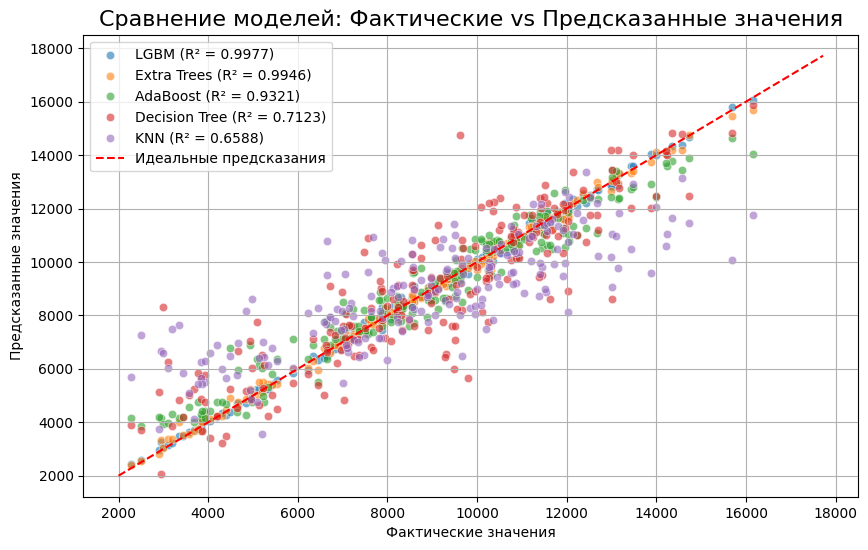

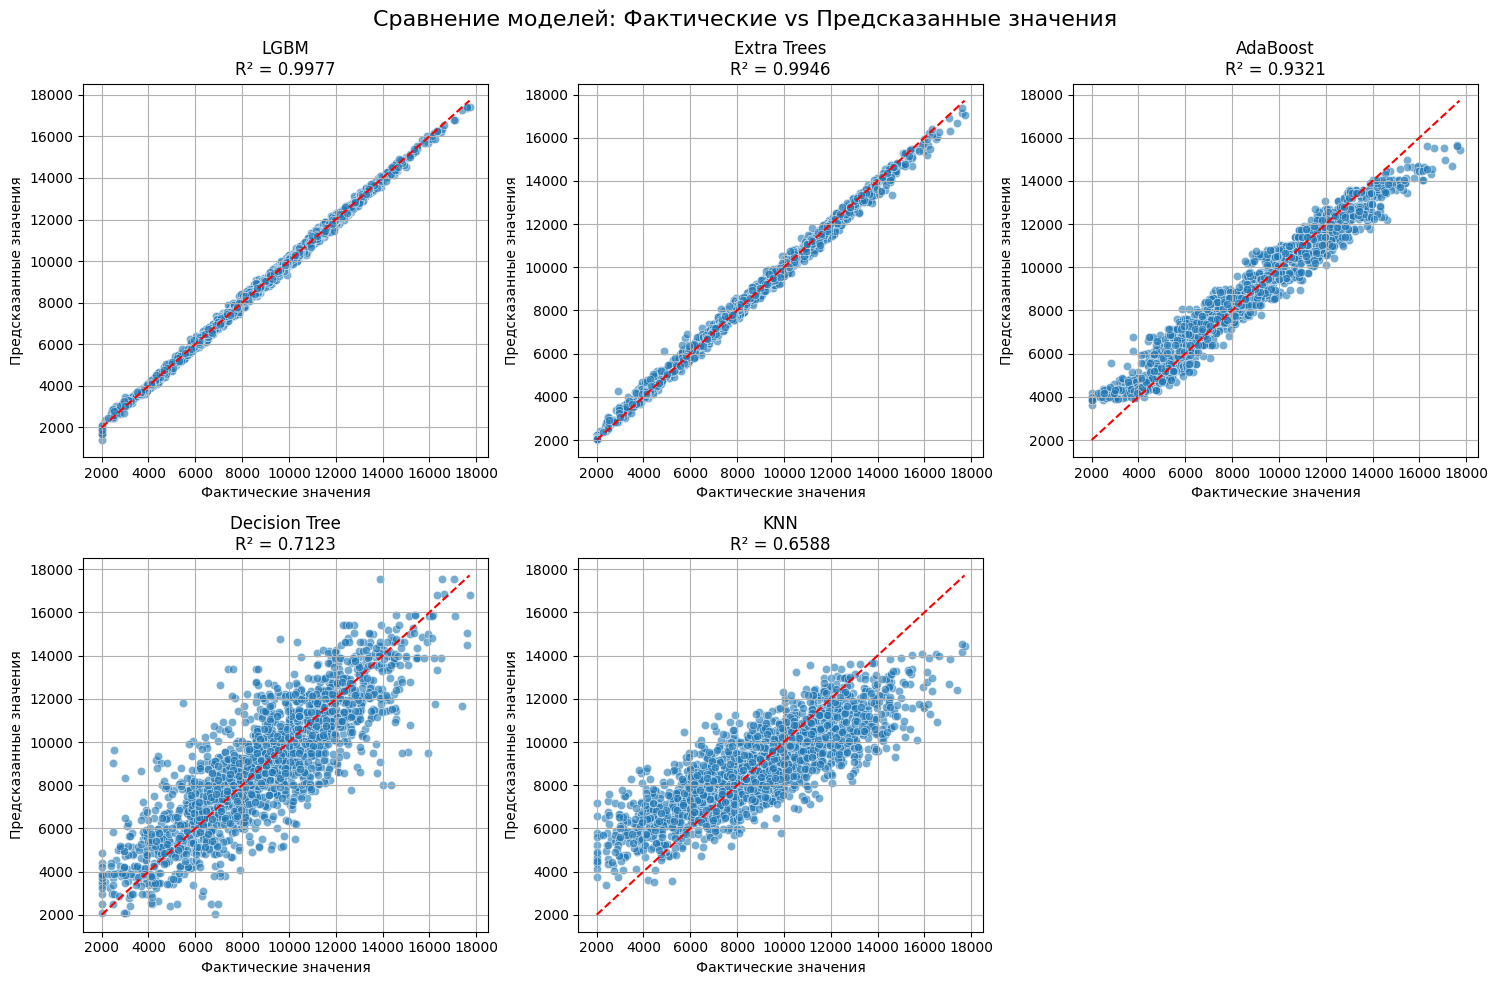

                       MAE             MSE        R² CV R² Mean CV R² Std  \
LGBM            113.486507    20840.310935  0.997732   0.997477  0.000205   
Extra Trees     159.980565     49200.42595  0.994645   0.994085  0.000472   
AdaBoost        625.651396   623786.654471  0.932107   0.924464  0.004811   
Decision Tree  1248.496403  2643231.879856  0.712311   0.695035  0.033925   
KNN            1411.534813  3135270.899874  0.658758   0.641033  0.010346   

                                                          y_pred  
LGBM           [1946.7468459718932, 11220.384419223412, 14333...  
Extra Trees    [2179.4591666666665, 11118.818750000002, 13354...  
AdaBoost       [4004.7130281690143, 10772.010214007782, 12210...  
Decision Tree  [3398.0, 8617.333333333334, 12667.333333333334...  
KNN            [7165.808394191814, 10823.039837551758, 12493....  

Лучшая модель: LGBM с R² = 0.9977
Предсказанная стоимость автомобиля: $14464.01


In [3]:
# Кодирование категориальных признаков
categorical_cols = ['Brand', 'Model', 'Fuel_Type', 'Transmission']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cols = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Объединение закодированных признаков с числовыми
numerical_cols = df.drop(columns=categorical_cols + ['Price']).columns
X = pd.concat([df[numerical_cols].reset_index(drop=True), encoded_df], axis=1)
y = df['Price']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Настройка гиперпараметров и оценка для каждой модели
models = {
    "LGBM": (evaluate_lgbm, tune_lgbm),
    "Extra Trees": (evaluate_extra_trees, tune_extra_trees),
    "AdaBoost": (evaluate_adaboost, tune_adaboost),
    "Decision Tree": (evaluate_decision_tree, tune_decision_tree),
    "KNN": (evaluate_knn, tune_knn)
}

results = {}
best_models = {}  # Словарь для хранения лучших моделей

for name, (evaluate_func, tune_func) in models.items():
    print(f"Настройка и оценка модели: {name}")

    # Настройка гиперпараметров
    best_model = tune_func(X_train_scaled, y_train)
    y_pred = best_model.predict(X_test_scaled)

    # Сохраняем лучшую модель
    best_models[name] = best_model

    # Оценка модели
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Кросс-валидация
    scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='r2')

    # Сохранение результатов
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "R²": r2,
        "CV R² Mean": scores.mean(),
        "CV R² Std": scores.std(),
        "y_pred": y_pred
    }

    visualizer.plot_actual_vs_predicted(y_test, y_pred, name)

    print(f"Результаты для {name}: {results[name]}\n")

# Визуализация: сравнение всех моделей на одном графике
visualizer.plot_combined_results(y_test, results)

# Визуализация: отдельные графики для каждой модели
visualizer.plot_individual_results(y_test, results)

# Вывод результатов
results_df = pd.DataFrame(results).T
print(results_df)

# Выбор лучшей модели на основе R² (чем ближе к 1, тем лучше)
best_model_name = results_df['R²'].idxmax()
best_model = best_models[best_model_name]  # Получаем лучшую модель
print(f"\nЛучшая модель: {best_model_name} с R² = {results_df.loc[best_model_name, 'R²']:.4f}")

# Пример использования функции для предсказания
input_data = {
    'Brand': 'Audi',
    'Model': 'A4',
    'Year': 2024,
    'Engine_Size': 4.2,
    'Fuel_Type': 'Petrol',
    'Transmission': 'Manual',
    'Mileage': 28994,
    'Doors': 3,
    'Owner_Count': 1
}

try:
    predicted_price = predictor.predict_car_price(best_model, encoder, scaler, input_data)
except Exception as e:
    logger.exception(f"Ошибка предсказания стоимости: {e}")    

print(f"Предсказанная стоимость автомобиля: ${predicted_price:.2f}")
